In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Reference for Dataset : https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [2]:
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv("IMDB Dataset.csv",sep=',')

In [81]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production br br The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there s a family where a little boy ...,negative
4,Petter Mattei s Love in the Time of Money is...,positive


In [82]:
df.describe()#df.info()

,review,sentiment
count,50000,50000
unique,49581,2
top,Loved today s show It was a variety and not...,negative
freq,5,25000


In [4]:
import re
for i in range(len(df)):
    df.at[i,'review'] = re.sub('[^a-zA-Z]',' ',df.at[i,'review'])

In [ ]:
#df['review']

In [83]:
df['length'] = df['review'].apply(len)

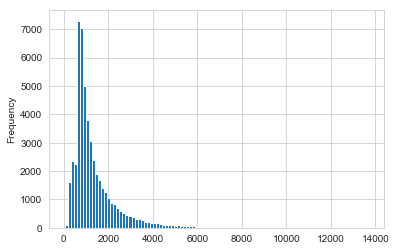

In [84]:
df['length'].plot.hist(bins=100)

In [85]:
df['length'].describe()

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C98316BE0>,
      dtype=object)

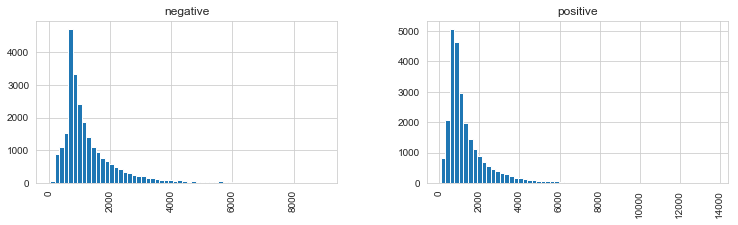

In [86]:
df.hist(column='length',by='sentiment',bins=60,figsize=(12,3))

In [5]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [6]:
ps = PorterStemmer()

In [7]:
import string
def text_process(mess):
    mess = mess.split('br')
    mess = ''.join(mess)
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [ps.stem(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['review'],df['sentiment'],test_size=0.3)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer=text_process,tokenizer=lambda doc: doc,lowercase=False)

In [11]:
training = cv.fit_transform(x_train)
testing = cv.transform(x_test)

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer
tf = TfidfTransformer().fit(training)
training = tf.transform(training)
testing = tf.transform(testing)

In [72]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(training,y_train)

In [73]:
pred = model.predict(testing)

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

    negative       0.88      0.85      0.86      7738
    positive       0.84      0.87      0.86      7262

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



In [76]:
print(confusion_matrix(pred,y_test))

[[6556 1182]
 [ 919 6343]]


In [77]:
test = 'This movie was abysmal.It could have been better!'  #Testing on a single string
test = re.sub('[^a-zA-Z]',' ',test)

In [78]:
test = cv.transform([test])

In [79]:
prediction = model.predict(test)

In [80]:
prediction

array(['negative'], dtype='<U8')